# PROJECT DESCRIPTION

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

IMPORTING REQUIRED LIBRARIES

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [122]:
df=pd.read_csv("Mushroom_Project.csv")

In [123]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


As we see that the data in the feature_frames is string value so we have to convert it into numeric value using Label_Encoder so that we can train our model

# PREPROCESSING

In [124]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [125]:
LE=LabelEncoder()
for i in range(len(df.columns)):
    df[df.columns[i]]=LE.fit_transform(df[df.columns[i]])

In [126]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [127]:
df.shape

(8124, 23)

we found the dataset contains 8124 row and 23 columns including the target variable class

# Checking for null values

In [128]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

we don't have any null values in the given dataset

In [129]:
df.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Checking Class Imbalace

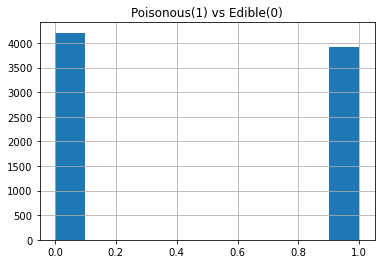

In [130]:
#plotting a histogram to check data imbalance
df['class'].hist(grid=True)
plt.title("Poisonous(1) vs Edible(0)")
plt.show()

we don't find any data imbalance

# SPLITTING AND SCALING OF DATA

In [131]:
x=df.drop('class',axis=1)
y=df['class']

In [132]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [133]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [134]:
#scaling the x part
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [135]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [136]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

# CHECKING FOR SKEWNESS

In [137]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

as we see that the skewness is not within the acceptable limits in numerous columns so we will use power transform to reduce the skewnwss

# REMOVING SKEWNESS

In [138]:
from sklearn.preprocessing import power_transform

As we see that veil-type is only having single value which suggests that it won't interfere with the target variable so we can drop this column

In [139]:
x1=x.drop('veil-type',axis=1)
x1.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [140]:
x1.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [141]:
df_new=power_transform(x1)
df_new=pd.DataFrame(df_new,columns=x1.columns)

In [142]:
df_new.skew()

cap-shape                  -0.126329
cap-surface                -0.204287
cap-color                  -0.021222
bruises                     0.342750
odor                        0.053498
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.019893
stalk-shape                -0.271345
stalk-root                  0.087467
stalk-surface-above-ring   -0.014425
stalk-surface-below-ring    0.183128
stalk-color-above-ring     -0.533477
stalk-color-below-ring     -0.469582
veil-color                  8.408442
ring-number                -2.967514
ring-type                  -0.184135
spore-print-color           0.149991
population                 -0.010542
habitat                     0.273797
dtype: float64

In [143]:
x=df_new

# MODEL TRAINING

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [145]:
#checking for best random_state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy Score is: ",maxAccu,"on Random_state: ",maxRS)

Best Accuracy Score is:  0.9634946677604594 on Random_state:  116


We found the best random state at 116 so we will train our model at random_state=116

# CREATING TRAIN_TEST_SPLIT 

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=116)

In [147]:
from sklearn.metrics import confusion_matrix,classification_report

In [148]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9634946677604594
[[1203   49]
 [  40 1146]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1252
           1       0.96      0.97      0.96      1186

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddtc=DTC.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[1252    0]
 [   0 1186]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predrfc=RFC.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

1.0
[[1252    0]
 [   0 1186]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [153]:
from sklearn.svm import SVC

In [154]:
SVM=SVC()
SVM.fit(x_train,y_train)
predsvc=SVM.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9995898277276456
[[1251    1]
 [   0 1186]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



we cannot rely on accuracy score as it can be due to overfitting so we will check cross validation scores

In [155]:
from sklearn.model_selection import cross_val_score

In [156]:
cvslr=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score for Logistic Regression model is",cvslr.mean())

Cross Validation Score for Logistic Regression model is 0.8110158393330806


In [157]:
cvsdtc=cross_val_score(DTC,x,y,cv=5)
print("Cross Validation Score for Decision Tree Classifier is",cvsdtc.mean())

Cross Validation Score for Decision Tree Classifier is 0.9128227358848049


In [158]:
cvsrfc=cross_val_score(RFC,x,y,cv=5)
print("Cross Validation Score for Random Forest Classifier is",cvsrfc.mean())

Cross Validation Score for Random Forest Classifier is 0.8878274346343312


In [159]:
cvssvc=cross_val_score(RFC,x,y,cv=5)
print("Cross Validation Score for Support Vector Classifier is",cvssvc.mean())

Cross Validation Score for Support Vector Classifier is 0.889305115574081


# DIFFERENCE BETWEEN ACCURACY SCORE AND CROSS VAL SCORE

In [160]:
print("LR1=",.963-.811)

LR1= 0.1519999999999999


In [161]:
print("DTC1=",1-.967)

DTC1= 0.03300000000000003


In [162]:
print("RFC1=",1-.898)

RFC1= 0.10199999999999998


In [163]:
print("SVM1=",.999-.886)

SVM1= 0.11299999999999999


from the above calculation the least difference between accuracy score and cross val score is for Decision Tree Model. So our best model is Decision Tree

# HYPER PARAMETER TUNING

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
#creating parameter list
parameters={'max_depth' : np.arange(2,15),
           'criterion' : ['gini','entropy']}

In [166]:
GCV=GridSearchCV(DTC,parameters,cv=5)

In [167]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [168]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [169]:
Final_Model=DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=116)
Final_Model.fit(x_train,y_train)
predfm=Final_Model.predict(x_test)
print(accuracy_score(y_test,predfm)*100)

100.0


# SAVING THE MODEL

In [170]:
import joblib
joblib.dump(Final_Model,"Final_Model_Mushrrom_Practice_project_2.pkl")

['Final_Model_Mushrrom_Practice_project_2.pkl']

# LOADING THE SAVED MODEL

In [171]:
model=joblib.load('Final_Model_Mushrrom_Practice_project_2.pkl')

In [172]:
prediction=model.predict(x_test)

In [173]:
print(accuracy_score(y_test,prediction)*100)

100.0


In [174]:
prediction=pd.DataFrame(prediction)

In [175]:
prediction

,0
0,0
1,0
2,0
3,1
4,0
...,...
2433,1
2434,0
2435,1
2436,0


In [176]:
prediction.to_csv("Final_Model_Mushrrom_Practice_project_2_results.csv")

In [1]:
import os

In [2]:
print(os.getcwd())

C:\Users\No
